# Introductıon
* In this notebook i will create a ML model to predict death situation of covid 19.

### The notebook includes:
* Data Importing
* Data Preprocessing
* Data Preparing & Cleaning
* Missing Value Analysis
* Data Visualization
* Future Selection
* Creating Model
* Model Analysis
* Improving Model
* Solving Imbalance Dataset Problem With Undersampling

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Abot The Dataset
#### This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.

# Overview Dataset

In [49]:
df = pd.read_csv("./Covid Data.csv")
print("Shape of df :",df.shape)
df.head()

Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [65]:
df.isna().sum().sum()

0

* We have no NaN values but we will have missing values.

### Number of unique values by columns

In [66]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [67]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [68]:
df.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

### INFERENCE:
* 1) We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1,2,99) 99 represents NaN values. Hence we will just take the rows that includes 1 and 2 values.
#### 
* 2) In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

# Data Preprocessing

### Getting rid of the missing values of features except "INTUBED", "PREGNANT", "ICU"

In [50]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

### Preaparing "DATE_DIED" column

In [51]:
# If we have "9999-99-99" values that means this patient is alive.

df["DEATH"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

### Pregnant-Sex Bar Plot

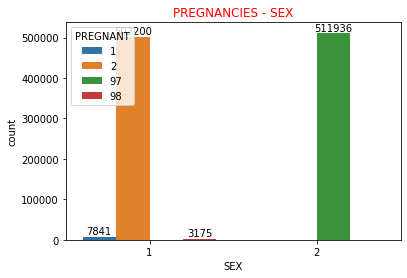

In [71]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

* We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2.

In [52]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97,2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

### Missing value analysis of "INTUBED" feature

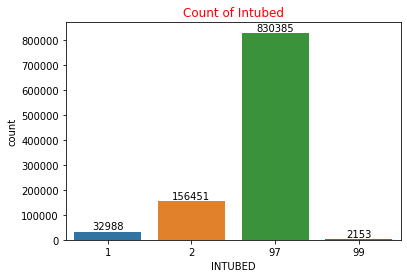

In [73]:
ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

### Missing value analysis of "ICU" feature

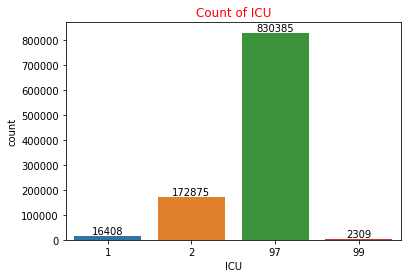

In [74]:
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

### Droping the columns
* In "INTUBED" and "ICU" features there are too many missing values so i will drop them. Also we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.

In [53]:
#df = df[(df.INTUBED == 1) | (df.INTUBED == 2)]
#df = df[(df.ICU == 1) | (df.ICU == 2)]
#df.drop(columns="DATE_DIED", inplace=True)
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

### Number of unique values by columns 

In [76]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


* As we see, we have just one numeric feature which is called "AGE" the rest of them are categorical.

In [54]:
df.mask(df==2, df-2,inplace=True)

In [78]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,0,1,1,1,1,65,0,0,0,0,0,1,0,0,0,0,0,3,1
1,0,1,0,1,1,72,0,0,0,0,0,1,0,0,1,1,0,5,1
2,0,1,0,0,0,55,0,1,0,0,0,0,0,0,0,0,0,3,1
3,0,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,0,7,1
4,0,1,0,1,0,68,0,1,0,0,0,1,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,13,0,1,0,40,0,0,0,0,0,0,0,0,0,0,0,7,0
1048571,1,13,0,0,0,51,0,0,0,0,0,1,0,0,0,0,0,7,0
1048572,0,13,0,1,0,55,0,0,0,0,0,0,0,0,0,0,0,7,0
1048573,0,13,0,1,0,28,0,0,0,0,0,0,0,0,0,0,0,7,0


# Data Visualization

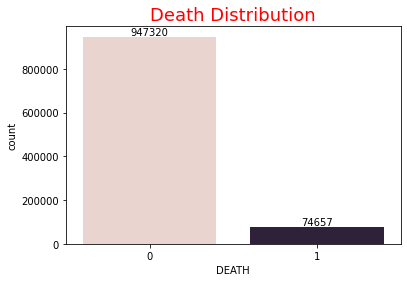

In [79]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

* The values are distributed unbalanced in target column. This will probably cause an imbalance problem. Nonetheless i want you to see the problem. Hence i will go ahead for now and if we meet this problem i will try to figure it out.

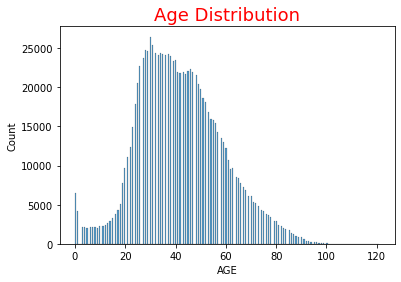

In [80]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18);

* Patients are roughly between 20-60 years old.

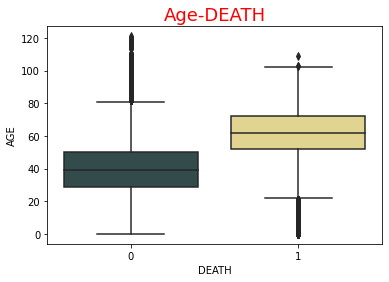

In [81]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

* The older patients are more likely to die compare to younger ones.

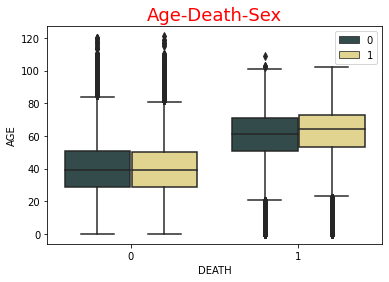

In [82]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

* The older patients are more likely to die compare to younger ones.
* There is no serious difference between males and females in terms of average rate of patients.

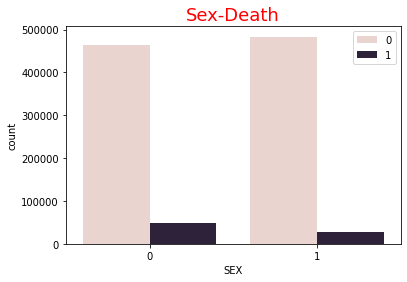

In [83]:
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best");

* Males are more likely to die of covid compare to females.

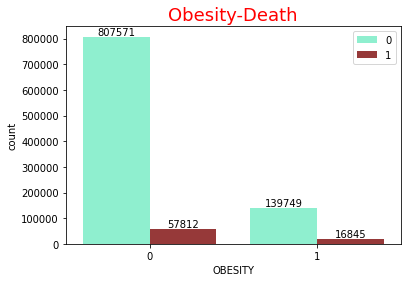

In [84]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

* Obese patients are more likely to die from covid compare to non-obese patients.

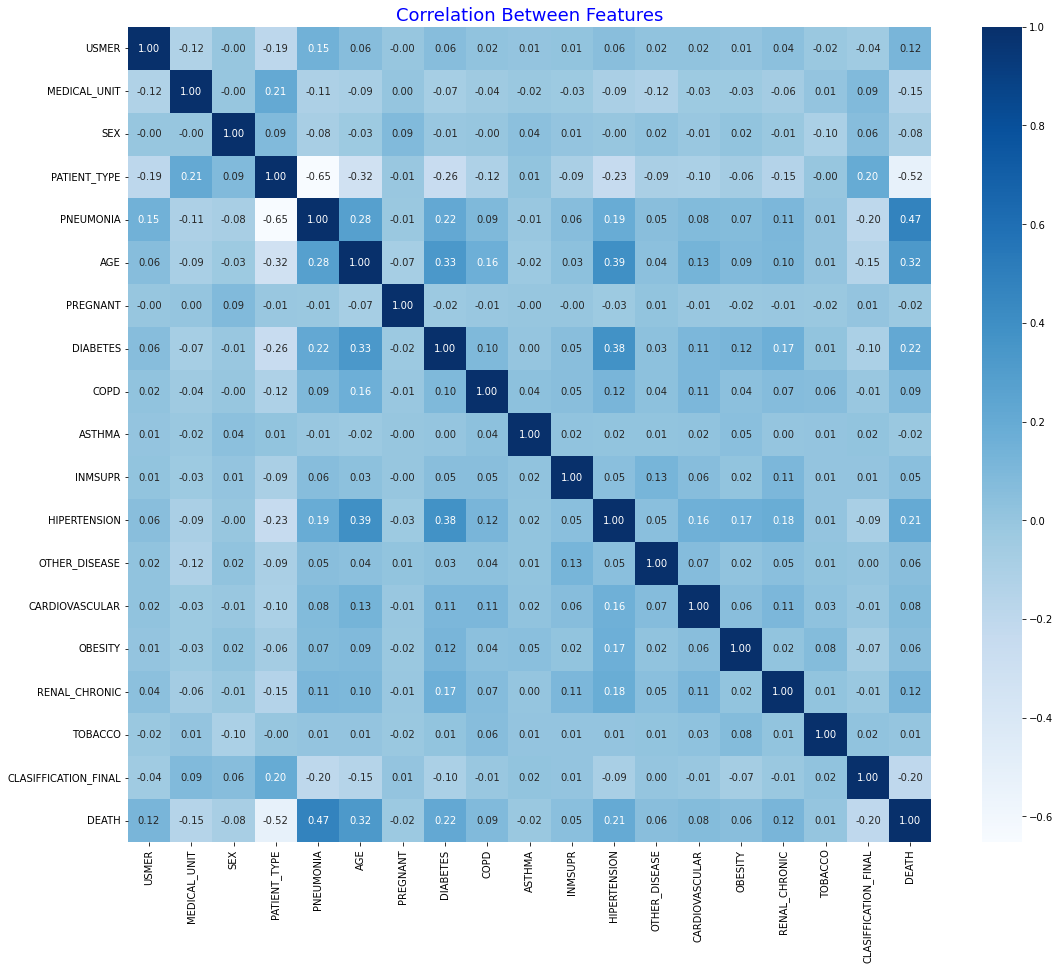

In [57]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap='Blues')
plt.title("Correlation Between Features",fontsize=18,color="blue");

# Future Selection
* I will drop the features that have low correlation with "DEATH" feature.

In [58]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [59]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,0,1,1,1,65,0,1,0,3,1
1,0,1,1,1,72,0,1,1,5,1
2,0,1,0,0,55,1,0,0,3,1
3,0,1,1,0,53,0,0,0,7,1
4,0,1,1,0,68,1,1,0,3,1


### Preparing the categorical features which are not binary

In [60]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

### Scaling the numeric feature

In [61]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

### Determining the "x" and "y"

In [62]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9394459774163878


In [65]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.96768821 0.51920911]


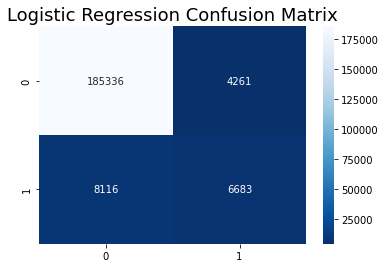

In [69]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f",cmap='Blues_r')
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="black");

## Inference:
* We got well accuracy with Logistic Regression.
* But it can mislead us so we have to check the other metrics.
* When we look at the F1 Score it says that we predicted the patients who survived well but we can't say the same thing for dead patients.
* Also we see the same thing when we check the confusion matrix. This problem is based on imbalance dataset as i mentioned about it.

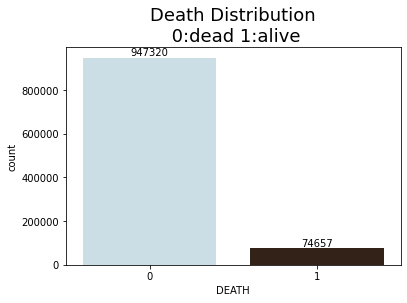

In [89]:
ax = sns.countplot(df.DEATH, palette=sns.cubehelix_palette(2, start=1.5, rot=-0.75))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution\n 0:dead 1:alive", fontsize=18,color="black");

# How To Solve Imbalance Dataset Problem
* Loading More Datas
* Changing The Perfomance Metrics
* Resampling (Undersampling or Oversampling)
* Changing The Algorithm
* Penalized Models etc.

##### I am going to use Undersampling for this case because we already have too many patients.
* Undersampling : Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. 
* If we use Oversampling our row number will increase so this is too many rows for computer.
* If i can't solve the problem with Undersampling i will use the others.

In [24]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

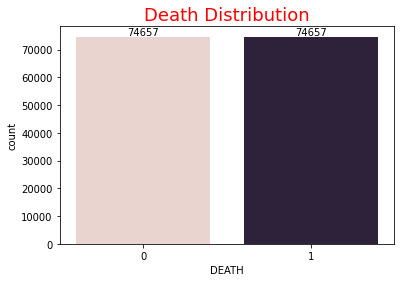

In [97]:
ax = sns.countplot(y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

# Train Test Split After Undersampling

In [27]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


# Logistic Regression After Undersampling

In [99]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9052673877373338


In [100]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.90360173 0.90687646]


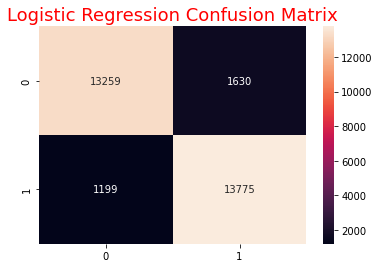

In [101]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

* We solved the problem with Undersampling. We also could've used Oversampling and probably we would get better accuracy but i think it would be so tiring for computer.

## Logistic Regression Curve

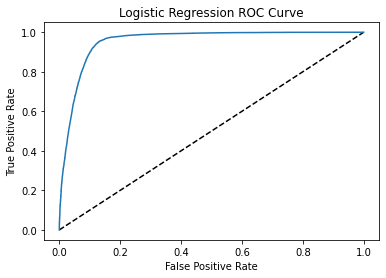

In [102]:
from sklearn.metrics import roc_curve
#test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# Conclusion
* In this project i predicted "Death" situation with %90 accuracy.
* I just used one algorithm Logistic Regression.
* The important point in this project was solving the imbalance dataset problem. I figured it out with Undersampling method.
* If you found this notebook beneficial please upvote it and follow me. Thanks...

# MLP

In [31]:
import torch.nn as nn
import torch


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
x_train =np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = torch.FloatTensor((x_train))
y_train = torch.LongTensor((y_train))
x_test = torch.FloatTensor((x_test))
y_test = torch.LongTensor((y_test))
train_size=len(y_train)

In [105]:
class NET(nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_hidden3, n_output):
        super(NET, self).__init__()
        self.hidden1 = nn.Linear(n_feature, n_hidden1)
        self.relu1 = nn.ReLU()

        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = nn.ReLU()

        self.hidden3 = nn.Linear(n_hidden2, n_hidden3)
        self.relu3 = nn.ReLU()

        self.out = nn.Linear(n_hidden3, n_output)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        hidden1 = self.hidden1(x)
        relu1 = self.relu1(hidden1)

        hidden2 = self.hidden2(relu1)
        relu2 = self.relu2(hidden2)

        hidden3 = self.hidden3(relu2)
        relu3 = self.relu3(hidden3)
        out = self.out(relu3)

        return out

    def test(self, x):
        y_pred = self.forward(x)
        y_predict = self.softmax(y_pred)

        return y_predict


In [106]:
x_train.shape[1]

25

In [107]:
net = NET(n_feature=x_train.shape[1], n_hidden1=30,
          n_hidden2=60, n_hidden3=30, n_output=2)
optimizer=torch.optim.Adagrad(net.parameters(), lr=0.001, lr_decay=0, weight_decay=0)
torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2,
                                           threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-5, eps=1e-08, verbose=True)


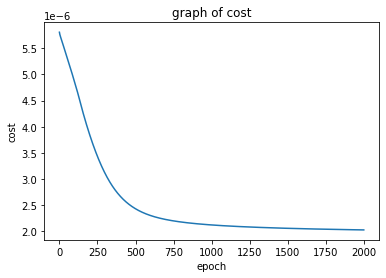

training set accuracy 0.9130187273442667
test set accuracy 0.9101228945517865


In [108]:
loss_func = torch.nn.CrossEntropyLoss()
costs = []
num_epoch = 2000

#训练网络
for  epoch in range(num_epoch):
    cost = 0
    out = net.forward(x_train)
    loss = loss_func(out,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cost += loss.cpu().detach().numpy()
    costs.append(cost/train_size)
 
plt.plot(costs)
plt.title('graph of cost')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()
#print(costs)
#training set accuracy
out = net.test(x_train)
#prediction = torch.argmax(out,dim = 1)
prediction = torch.max(out,1)[1]
pred_y = prediction.numpy()
target_y = y_train.numpy()
accuracy = float((pred_y == target_y).astype(int).sum())/float(target_y.size)
print("training set accuracy",accuracy)
#test set accuracy
out1 = net.test(x_test)
prediction1 = torch.argmax(out1,dim = 1)
#prediction1 = torch.max(out1,1)[1]
pred_y1 = prediction1.numpy()
target_y1 = y_test.numpy()
accuracy1 = float((pred_y1 == target_y1).astype(int).sum())/float(target_y1.size)
print("test set accuracy",accuracy1)

In [109]:
f1_score(target_y1,pred_y1,average=None)

array([0.90725639, 0.91281751])

Text(0.5, 1.0, 'MLP Confusion Matrix')

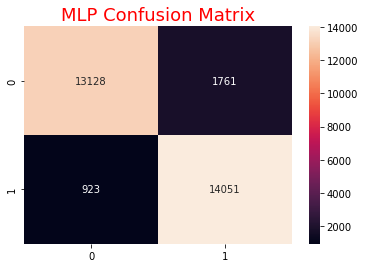

In [110]:
sns.heatmap(confusion_matrix(target_y1, pred_y1), annot=True, fmt=".0f")
plt.title("MLP Confusion Matrix",fontsize=18, color="red")

# RANDOM FOREST

In [111]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix
model1 = RandomForestClassifier(
    ccp_alpha=0.001, criterion='entropy', max_depth=8, max_leaf_nodes=3)
model1.fit(x_train, y_train)
pred2=model1.predict(x_test)
print(model1.score(x_test, y_test))

0.9049325251984061


In [112]:
f1_score(y_test.numpy(),pred2,average=None)

array([0.90199192, 0.90770181])

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

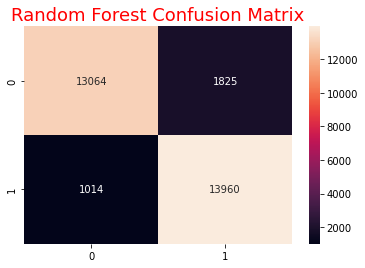

In [113]:
sns.heatmap(confusion_matrix(target_y1, pred2), annot=True, fmt=".0f")
plt.title("Random Forest Confusion Matrix",fontsize=18, color="red")

In [114]:
from sklearn.model_selection import GridSearchCV


In [115]:
param_grid=[{'ccp_alpha':[0.0, 0.005, 0.007, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1],
'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9],'max_leaf_nodes':[2,3,4,5,6,7,8,9]}]

In [116]:
search=GridSearchCV(estimator=model1,param_grid=param_grid)
best_model=search.fit(x_train,y_train)

In [117]:
from sklearn.metrics import f1_score
f1_score(y_test.numpy(),pred2,average=None)

array([0.90199192, 0.90770181])

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

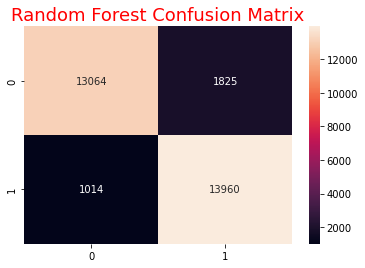

In [118]:
sns.heatmap(confusion_matrix(y_test, pred2), annot=True, fmt=".0f")
plt.title("Random Forest Confusion Matrix",fontsize=18, color="red")

In [126]:
pred_best=best_model.predict(x_test)
f1_score(y_test.numpy(),pred_best,average=None)

array([0.90360771, 0.91172697])

Text(0.5, 1.0, 'Best Random Forest Confusion Matrix')

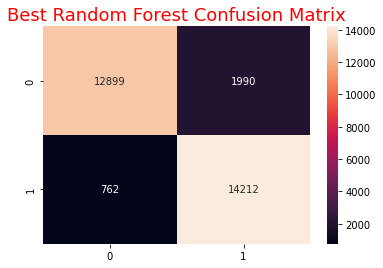

In [127]:
sns.heatmap(confusion_matrix(y_test, pred_best), annot=True, fmt=".0f")
plt.title("Best Random Forest Confusion Matrix",fontsize=18, color="red")

# SVM

In [29]:
from sklearn import svm


In [120]:
clf = svm.SVC(C=0.8, kernel='linear', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())


SVC(C=0.8, gamma=20, kernel='linear')

In [121]:
pred3 = clf.predict(x_test)
f1_score(y_test.numpy(),pred3,average=None)

array([0.88573486, 0.89092516])

Text(0.5, 1.0, 'SVM Confusion Matrix')

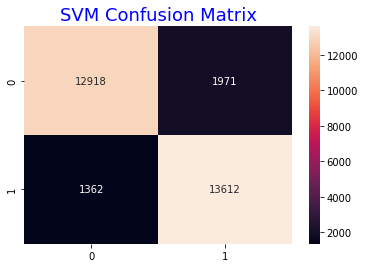

In [122]:
sns.heatmap(confusion_matrix(target_y1, pred3), annot=True, fmt=".0f")
plt.title("SVM Confusion Matrix",fontsize=18, color="blue")

In [35]:
clf1 = svm.SVC(C=1, kernel='rbf', gamma='auto',
              decision_function_shape='ovr')
clf1.fit(x_train, y_train.ravel())
pred_ = clf1.predict(x_test)
f1_score(y_test.numpy(), pred_, average=None)


array([0.89920949, 0.90901561])

Text(0.5, 1.0, 'SVM Confusion Matrix')

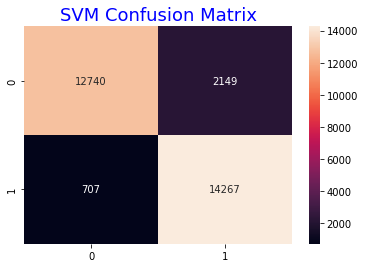

In [37]:
sns.heatmap(confusion_matrix(y_test, pred_), annot=True, fmt=".0f")
plt.title("SVM Confusion Matrix",fontsize=18, color="blue")

# CNN

In [123]:
from torchvision import models


In [124]:
res=models.resnet50(pretrained="True")
optimizer = torch.optim.Adagrad(
    res.parameters(), lr=0.001, lr_decay=0, weight_decay=0)
torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2,
                                           threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-5, eps=1e-08, verbose=True)


In [125]:
loss_func = torch.nn.CrossEntropyLoss()
costs = []
num_epoch = 2000

#训练网络
for  epoch in range(num_epoch):
    cost = 0
    out = res.forward(x_train)
    loss = loss_func(out,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cost += loss.cpu().detach().numpy()
    costs.append(cost/train_size)
 
plt.plot(costs)
plt.title('graph of cost')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()
#print(costs)
#training set accuracy
out = net.test(x_train)
#prediction = torch.argmax(out,dim = 1)
prediction = torch.max(out,1)[1]
pred_y = prediction.numpy()
target_y = y_train.numpy()
accuracy = float((pred_y == target_y).astype(int).sum())/float(target_y.size)
print("training set accuracy",accuracy)
#test set accuracy
out1 = net.test(x_test)
prediction1 = torch.argmax(out1,dim = 1)
#prediction1 = torch.max(out1,1)[1]
pred_y1 = prediction1.numpy()
target_y1 = y_test.numpy()
accuracy1 = float((pred_y1 == target_y1).astype(int).sum())/float(target_y1.size)
print("test set accuracy",accuracy1)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [119451, 25]

# LDA

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [129]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [130]:
lda.get_params()


{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [131]:
pred4=lda.predict(x_test)
f1_score(y_test.numpy(),pred4,average=None)

array([0.89421431, 0.89874164])

Text(0.5, 1.0, 'LDA Confusion Matrix')

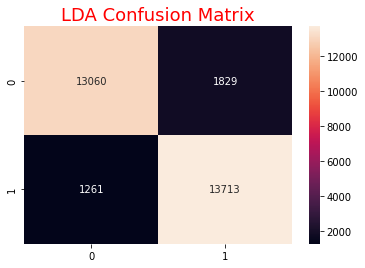

In [132]:
sns.heatmap(confusion_matrix(target_y1, pred4), annot=True, fmt=".0f")
plt.title("LDA Confusion Matrix",fontsize=18, color="red")

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, max_depth=10, ccp_alpha=0.00001)
model.fit(x_train,y_train)
pred_tree=model.predict(x_test)
f1_score(y_test.numpy(),pred_tree,average=None)

array([0.90782074, 0.91513651])